# Predicting Risk based on Audit Report

To predict risk of suspicous firms based on the audit report provided by the accountants

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cd D:\New\audit_data

D:\New\audit_data


In [3]:
# load data using pandas
df = pd.read_csv('audit_risk.csv')
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

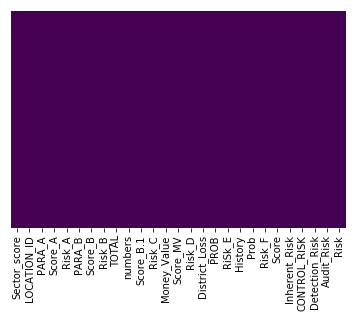

In [5]:
# a heatmap to check for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Looks like data contains no null value, but the column 'Location_Id' is of object type which is unable to convert to integer type. It means that it contains some junk values too. If this attribute is not much of help, we will drop it.

### Feature Selection

In [6]:
# calculate correlation of Risk with al the features
df.corr()['Risk'].drop('Risk')

Sector_score     -0.394131
PARA_A            0.378758
Score_A           0.619726
Risk_A            0.385067
PARA_B            0.257029
Score_B           0.635768
Risk_B            0.255286
TOTAL             0.292022
numbers           0.308141
Score_B.1         0.353803
Risk_C            0.342140
Money_Value       0.256992
Score_MV          0.688367
Risk_D            0.254355
District_Loss     0.403806
PROB              0.176912
RiSk_E            0.411803
History           0.239453
Prob              0.298639
Risk_F            0.214511
Score             0.785995
Inherent_Risk     0.357020
CONTROL_RISK      0.416474
Detection_Risk         NaN
Audit_Risk        0.217113
Name: Risk, dtype: float64

Since there is no feature that has exetremly low correlation with the target class, so we can not drop any column at this time.

We move ahead to our next step

In [7]:
# an algorithm to find out pairs that have correlation more than 90%
# later we will drop one from each unique pair
features = ['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
           'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
           'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
           'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
           'Audit_Risk', 'Risk']
for i in features:
    for j in features:
        if (df.corr()[i][j] >= 0.9) & (i != j):
            print(i,j)
        else:
            pass


PARA_A Risk_A
Risk_A PARA_A
PARA_B Risk_B
PARA_B TOTAL
Score_B Score
Risk_B PARA_B
Risk_B TOTAL
TOTAL PARA_B
TOTAL Risk_B
numbers Score_B.1
numbers Risk_C
Score_B.1 numbers
Score_B.1 Risk_C
Risk_C numbers
Risk_C Score_B.1
Money_Value Risk_D
Risk_D Money_Value
District_Loss RiSk_E
RiSk_E District_Loss
History Risk_F
Risk_F History
Score Score_B


In [8]:
# drop the columns from pair of features having above 90% correlation
# we will also drop 'Detection_Risk' since it has one unique value throughout
df.drop(labels=['PARA_A','PARA_B','TOTAL','Score_B','Score_B.1',
                'numbers','Money_Value','District_Loss','Detection_Risk',
                'History','LOCATION_ID'],axis=1,inplace=True)

In [9]:
# check if data is ready for training
df.head()

,Sector_score,Score_A,Risk_A,Risk_B,Risk_C,Score_MV,Risk_D,PROB,RiSk_E,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
0,3.89,0.6,2.508,0.500,1.0,0.2,0.676,0.2,0.4,0.2,0.0,2.4,8.574,0.4,1.7148,1
1,3.89,0.2,0.000,0.966,1.0,0.2,0.188,0.2,0.4,0.2,0.0,2.0,2.554,0.4,0.5108,0
2,3.89,0.2,0.102,0.046,1.0,0.2,0.000,0.2,0.4,0.2,0.0,2.0,1.548,0.4,0.3096,0
3,3.89,0.2,0.000,6.480,3.6,0.6,7.050,0.2,0.4,0.2,0.0,4.4,17.530,0.4,3.5060,1
4,3.89,0.2,0.000,0.016,1.0,0.2,0.000,0.2,0.4,0.2,0.0,2.0,1.416,0.4,0.2832,0


### Train-test split

split with test data 30%

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Risk',axis=1)
y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=70)

### Model

In [12]:
# using Logistic Regression
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()

In [14]:
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
# confusion_matrix and classification_report
print('confusion_matrix = \n',confusion_matrix(y_test,pred))
print('\n',classification_report(y_test,pred))

confusion_matrix = 
 [[147   0]
 [  3  83]]

              precision    recall  f1-score   support

          0       0.98      1.00      0.99       147
          1       1.00      0.97      0.98        86

avg / total       0.99      0.99      0.99       233



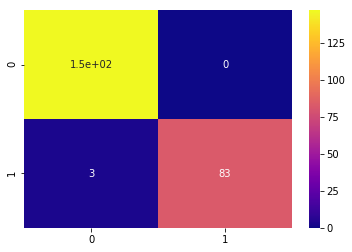

In [18]:
# heatmap for confusion matrix
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='plasma')

Our model is 99% accurate with right selection of features.